In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/Marcel Palma/Desktop/music_project_en.csv')

print(df.head(10))

df.info()

print(df.columns)

# Bucle en los encabezados poniendo todo en minúsculas
# lista para almacenar nuevos nombres en minúsculas
new_columns = []

# Iterar sobre cada columna del DataFrame
for column in df.columns:
    # Convertir el nombre a minúsculas
    name_lowered = column.lower()
    new_columns.append(name_lowered)

# Actualizar los nombres de las columnas
df.columns = new_columns

print(df.columns)

### Bucle en los encabezados eliminando los espacios
new_columns = []
# Iterar 
for column in df.columns:
    # Eliminar espacios
    name_stripped = column.strip()
    new_columns.append(name_stripped)

# Actualizar nombres
df.columns = new_columns

print(df.columns)

# Cambiar el nombre de la columna "userid"
# Renombrar
df = df.rename(columns={'userid': 'user_id'})
print(df.columns)


     userID                        Track            artist   genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile    rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg    rock   
2    20EC38            Funiculì funiculà       Mario Lanza     pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice    folk   
4  E2DC1FAE                  Soul People        Space Echo   dance   
5  842029A1                       Chains          Obladaet  rusrap   
6  4CB90AA5                         True      Roman Messer   dance   
7  F03E1C1F             Feeling This Way   Polina Griffith   dance   
8  8FA1D3BE                     L’estate       Julia Dalia  ruspop   
9  E772D5C0                    Pessimist               NaN   dance   

        City        time        Day  
0  Shelbyville  20:28:33  Wednesday  
1  Springfield  14:07:09     Friday  
2  Shelbyville  20:58:07  Wednesday  
3  Shelbyville  08:37:09     Monday  
4  Springfield  08:34:34     Monday  
5

In [2]:

df.info()
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  65079 non-null  object
 1   track    63736 non-null  object
 2   artist   57512 non-null  object
 3   genre    63881 non-null  object
 4   city     65079 non-null  object
 5   time     65079 non-null  object
 6   day      65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
user_id       0
track      1343
artist     7567
genre      1198
city          0
time          0
day           0
dtype: int64


In [3]:
columns_to_replace = ['track', 'artist', 'genre']

for column in columns_to_replace:
    if column in df.columns:  # Verificar si la columna existe
        df[column] = df[column].fillna('unknown')
    else:
        print(f"Advertencia: La columna '{column}' no existe en el DataFrame.")
        
print(df[columns_to_replace].isnull().sum())

# Mostrar fila con ejemplo corregido (si existía un NaN)
print("\n--- Ejemplo de fila corregida ---")
print(df[df[columns_to_replace].eq('unknown').any(axis=1)].head())

track     0
artist    0
genre     0
dtype: int64

--- Ejemplo de fila corregida ---
     user_id       track   artist    genre         city      time        day
9   E772D5C0   Pessimist  unknown    dance  Shelbyville  21:20:49  Wednesday
15  E3C5756F     unknown  unknown  unknown  Springfield  09:24:51     Monday
35  A8AE9169     unknown  unknown  unknown  Springfield  08:56:10     Monday
40  77979A66      Sci-Fi  unknown   rusrap  Shelbyville  08:45:43     Monday
54  3FA9A6A8  Inside Out  unknown  unknown  Springfield  10:00:41     Friday


In [4]:
print(df.duplicated().sum())

3826


In [5]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [6]:
def replace_wrong_genres(wrong_genres, correct_genre):
    """
    Reemplaza valores incorrectos en la columna 'genre' por un valor estandarizado.
    
    Parámetros:
    - wrong_genres (list): Lista de géneros incorrectos a reemplazar.
    - correct_genre (str): Nombre estandarizado para los géneros incorrectos.
    """
    for wrong_genre in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)

In [7]:
# Definir géneros incorrectos y el nombre correcto
wrong_genres = ['hip', 'hop', 'hip-hop']
correct_genre = 'hiphop'

# Ejecutar la función
replace_wrong_genres(wrong_genres, correct_genre)

In [8]:
# Mostrar géneros únicos después de la corrección
unique_genres = sorted(df['genre'].unique().tolist())
print("Géneros únicos actualizados:", unique_genres)

Géneros únicos actualizados: ['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans', 'alternative', 'ambient', 'americana', 'animated', 'anime', 'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook', 'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber', 'children', 'chill', 'chinese', 'choral', 'christian', 'christmas', 'classical', 'classicmetal', 'club', 'colombian', 'comedy', 'conjazz', 'contemporary', 'country', 'cuban', 'dance', 'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic', 'electropop', 'emo', 'entehno', 'epicmetal', 'estrada', 'ethnic', 'eurofolk', 'european', 'experimental', 'extrememetal', 'fado', 'film', 'fitness',

In [9]:
# Obtener géneros únicos ordenados alfabéticamente
unique_genres = sorted(df['genre'].unique().tolist())

# Mostrar resultados
print("--- Géneros únicos después de eliminar duplicados implícitos ---")
for genre in unique_genres:
    print(f"- {genre}")

print("\n--- Cantidad total de géneros únicos ---")
print(f"Número de géneros: {len(unique_genres)}")

--- Géneros únicos después de eliminar duplicados implícitos ---
- acid
- acoustic
- action
- adult
- africa
- afrikaans
- alternative
- ambient
- americana
- animated
- anime
- arabesk
- arabic
- arena
- argentinetango
- art
- audiobook
- avantgarde
- axé
- baile
- balkan
- beats
- bigroom
- black
- bluegrass
- blues
- bollywood
- bossa
- brazilian
- breakbeat
- breaks
- broadway
- cantautori
- cantopop
- canzone
- caribbean
- caucasian
- celtic
- chamber
- children
- chill
- chinese
- choral
- christian
- christmas
- classical
- classicmetal
- club
- colombian
- comedy
- conjazz
- contemporary
- country
- cuban
- dance
- dancehall
- dancepop
- dark
- death
- deep
- deutschrock
- deutschspr
- dirty
- disco
- dnb
- documentary
- downbeat
- downtempo
- drum
- dub
- dubstep
- eastern
- easy
- electronic
- electropop
- emo
- entehno
- epicmetal
- estrada
- ethnic
- eurofolk
- european
- experimental
- extrememetal
- fado
- film
- fitness
- flamenco
- folk
- folklore
- folkmetal
- folkrock

In [10]:
generos_problematicos = ['hip', 'hop', 'hip-hop']
encontrados = [genre for genre in unique_genres if genre in generos_problematicos]

print("\n--- ¿Quedan duplicados implícitos? ---")
if not encontrados:
    print("✅ No se encontraron 'hip', 'hop' ni 'hip-hop'.")
else:
    print(f"❌ Se encontraron: {encontrados}")


--- ¿Quedan duplicados implícitos? ---
✅ No se encontraron 'hip', 'hop' ni 'hip-hop'.


In [11]:
plays_by_city = df.groupby('city')['track'].count()
print("--- Reproducciones totales por ciudad ---")
print(plays_by_city)

--- Reproducciones totales por ciudad ---
city
Shelbyville    18512
Springfield    42741
Name: track, dtype: int64


In [12]:
# 2. Reproducciones por ciudad y día
days = ['Monday', 'Wednesday', 'Friday']

for day in days:
    plays_per_day = df[df['day'] == day].groupby(by='city')['track'].count()
    print(f"--- Reproducciones el {day} ---")
    print(plays_per_day)
    print(f"Diferencia: {abs(plays_per_day.diff().iloc[-1])}\n")

--- Reproducciones el Monday ---
city
Shelbyville     5614
Springfield    15740
Name: track, dtype: int64
Diferencia: 10126.0

--- Reproducciones el Wednesday ---
city
Shelbyville     7003
Springfield    11056
Name: track, dtype: int64
Diferencia: 4053.0

--- Reproducciones el Friday ---
city
Shelbyville     5895
Springfield    15945
Name: track, dtype: int64
Diferencia: 10050.0



In [13]:
# 1. Reproducciones totales por ciudad (absoluto y porcentaje)
total_plays = df.groupby('city')['track'].count()
total_global = total_plays.sum()
total_plays_pct = (total_plays / total_global * 100).round(2)

print("--- Reproducciones totales por ciudad ---")
print(pd.DataFrame({
    'Reproducciones': total_plays,
    '% del total': total_plays_pct.astype(str) + '%'
}))
print("\n" + "="*50 + "\n")

# 2. Reproducciones por día con porcentajes
days = ['Monday', 'Wednesday', 'Friday']

for day in days:
    # Calcular valores absolutos
    day_data = df[df['day'] == day]
    plays = day_data.groupby('city')['track'].count()
    
    # Calcular porcentajes
    total_day = plays.sum()
    pct = (plays / total_day * 100).round(2)
    
    # Crear DataFrame combinado
    result = pd.DataFrame({
        'Reproducciones': plays,
        '% del día': pct.astype(str) + '%'
    })
    
    print(f"--- Distribución el {day} ({total_day} reproducciones totales) ---")
    print(result)
    print(f"Diferencia absoluta: {abs(plays.diff().iloc[-1])} canciones")
    print("\n" + "-"*50 + "\n")

--- Reproducciones totales por ciudad ---
             Reproducciones % del total
city                                   
Shelbyville           18512      30.22%
Springfield           42741      69.78%


--- Distribución el Monday (21354 reproducciones totales) ---
             Reproducciones % del día
city                                 
Shelbyville            5614    26.29%
Springfield           15740    73.71%
Diferencia absoluta: 10126.0 canciones

--------------------------------------------------

--- Distribución el Wednesday (18059 reproducciones totales) ---
             Reproducciones % del día
city                                 
Shelbyville            7003    38.78%
Springfield           11056    61.22%
Diferencia absoluta: 4053.0 canciones

--------------------------------------------------

--- Distribución el Friday (21840 reproducciones totales) ---
             Reproducciones % del día
city                                 
Shelbyville            5895    26.99%
Spring

In [14]:
# Definir la función number_tracks()
def number_tracks(day, city):
    # Filtrar primero por día
    day_filter = df[df['day'] == day]
    # Luego filtrar por ciudad
    city_filter = day_filter[day_filter['city'] == city]
    # Contar los user_id únicos (o simplemente contar filas)
    return city_filter['user_id'].count()

In [15]:
# Realizar las seis llamadas requeridas
print("Canciones en Springfield el lunes:", number_tracks('Monday', 'Springfield'))
print("Canciones en Shelbyville el lunes:", number_tracks('Monday', 'Shelbyville'))
print("Canciones en Springfield el miércoles:", number_tracks('Wednesday', 'Springfield'))
print("Canciones en Shelbyville el miércoles:", number_tracks('Wednesday', 'Shelbyville'))
print("Canciones en Springfield el viernes:", number_tracks('Friday', 'Springfield'))
print("Canciones en Shelbyville el viernes:", number_tracks('Friday', 'Shelbyville'))

Canciones en Springfield el lunes: 15740
Canciones en Shelbyville el lunes: 5614
Canciones en Springfield el miércoles: 11056
Canciones en Shelbyville el miércoles: 7003
Canciones en Springfield el viernes: 15945
Canciones en Shelbyville el viernes: 5895


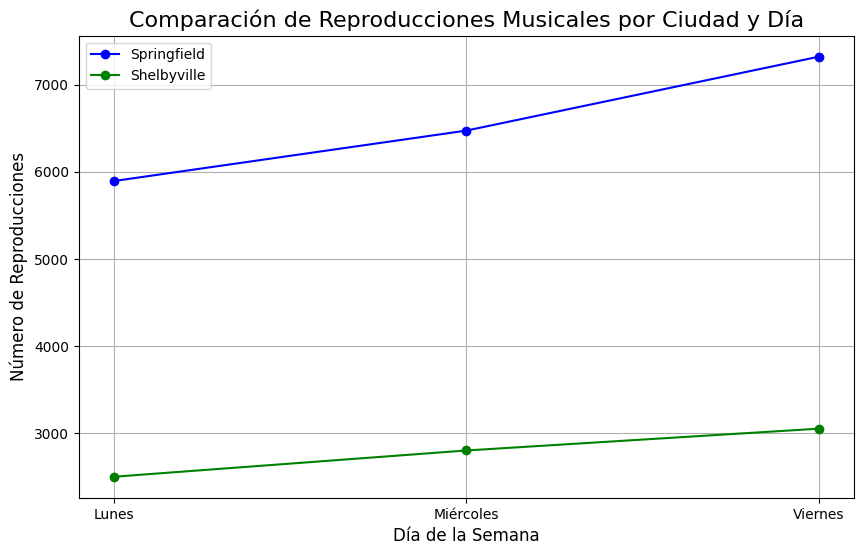

In [16]:
import matplotlib.pyplot as plt

# Datos de reproducciones por ciudad y día
days = ['Lunes', 'Miércoles', 'Viernes']
springfield = [5895, 6473, 7320]  # Reproducciones en Springfield
shelbyville = [2504, 2805, 3055]  # Reproducciones en Shelbyville

# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(days, springfield, marker='o', label='Springfield', color='blue')  # Línea para Springfield
plt.plot(days, shelbyville, marker='o', label='Shelbyville', color='green')  # Línea para Shelbyville

# Personalizar el gráfico
plt.title('Comparación de Reproducciones Musicales por Ciudad y Día', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Número de Reproducciones', fontsize=12)
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Agregar cuadrícula
plt.xticks(fontsize=10)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=10)  # Tamaño de las etiquetas del eje Y

# Mostrar el gráfico
plt.show()

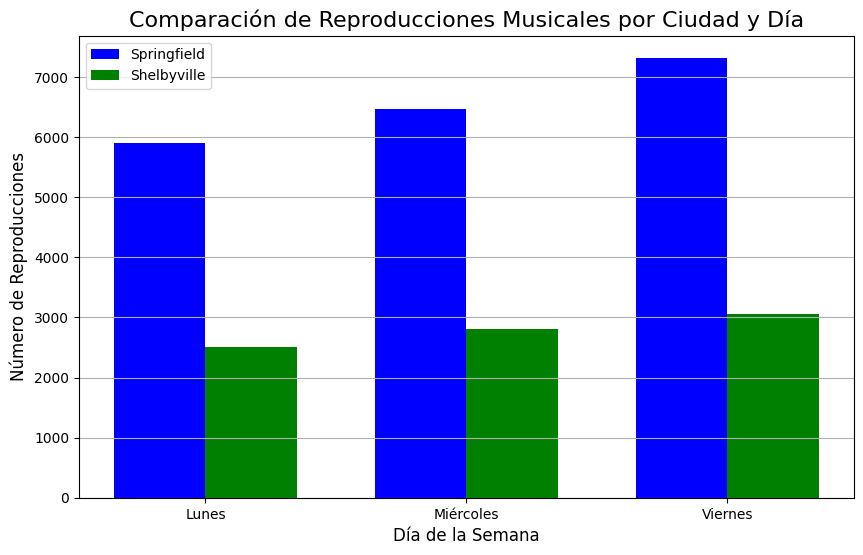

In [17]:
# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Ancho de las barras
x = range(len(days))  # Posiciones en el eje X

plt.bar(x, springfield, width=bar_width, label='Springfield', color='blue')
plt.bar([i + bar_width for i in x], shelbyville, width=bar_width, label='Shelbyville', color='green')

# Personalizar el gráfico
plt.title('Comparación de Reproducciones Musicales por Ciudad y Día', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Número de Reproducciones', fontsize=12)
plt.xticks([i + bar_width / 2 for i in x], days)  # Etiquetas del eje X
plt.legend()
plt.grid(True, axis='y')  # Cuadrícula solo en el eje Y

# Mostrar el gráfico
plt.show()